# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
data=pd.read_csv("breast-cancer.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data=data.drop(["id"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# EDA

In [5]:
data["diagnosis"]=data["diagnosis"].map({"B":1,"M":0})

<Axes: ylabel='count'>

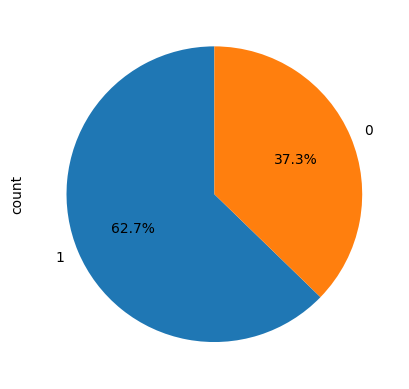

In [6]:
data["diagnosis"].value_counts().plot(kind="pie",autopct="%1.1f%%",startangle=90)

Boxplot of diagnosis


<Figure size 1000x600 with 0 Axes>

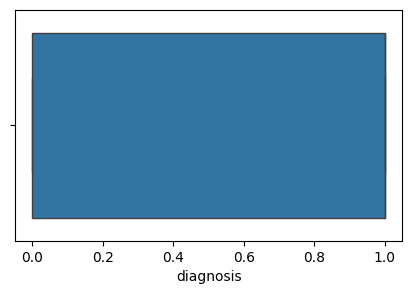

Boxplot of radius_mean


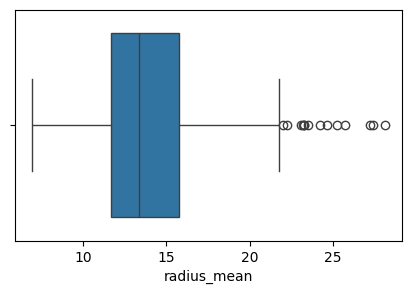

Boxplot of texture_mean


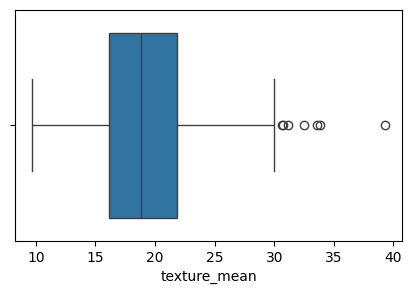

Boxplot of perimeter_mean


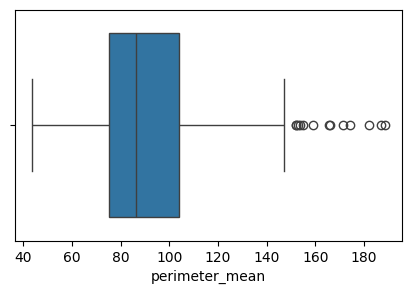

Boxplot of area_mean


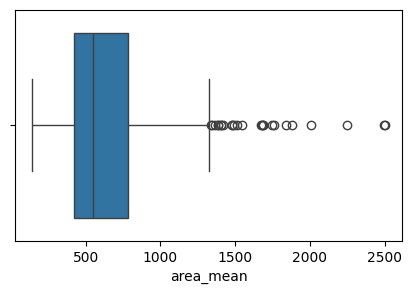

Boxplot of smoothness_mean


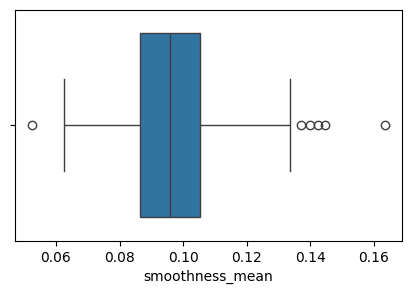

Boxplot of compactness_mean


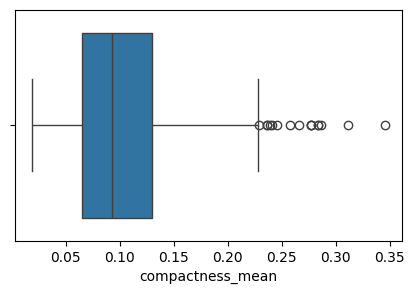

Boxplot of concavity_mean


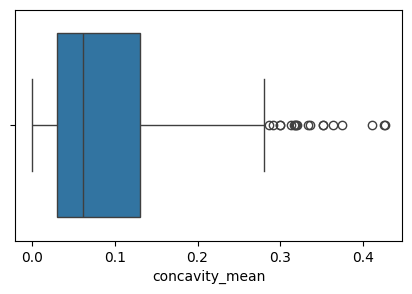

Boxplot of concave points_mean


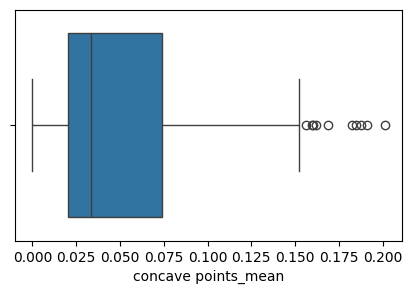

Boxplot of symmetry_mean


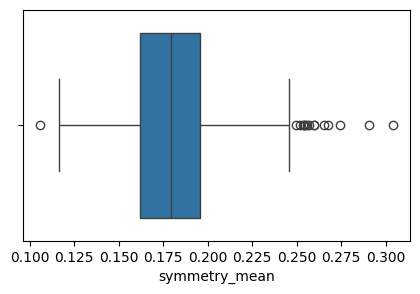

Boxplot of fractal_dimension_mean


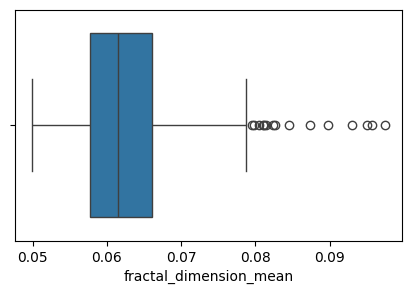

Boxplot of radius_se


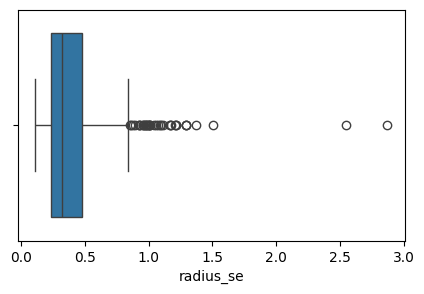

Boxplot of texture_se


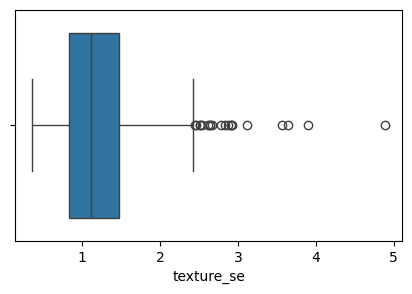

Boxplot of perimeter_se


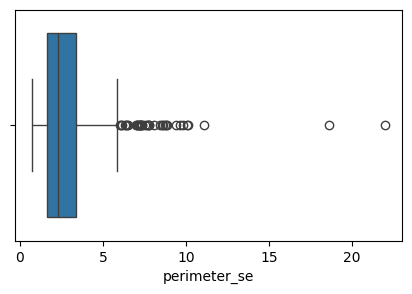

Boxplot of area_se


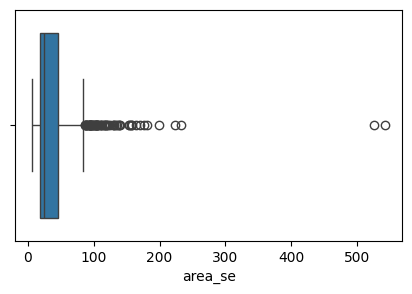

Boxplot of smoothness_se


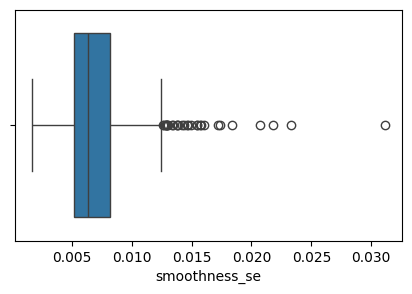

Boxplot of compactness_se


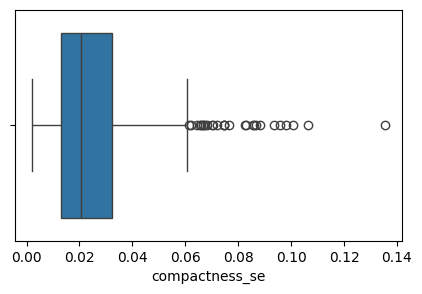

Boxplot of concavity_se


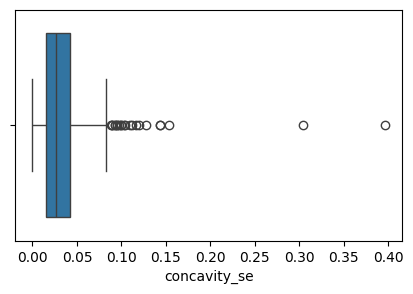

Boxplot of concave points_se


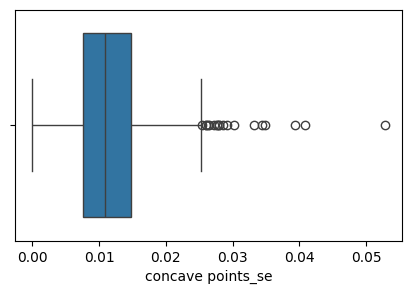

Boxplot of symmetry_se


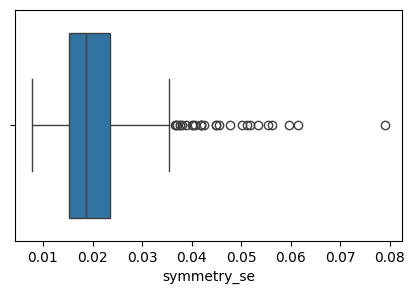

Boxplot of fractal_dimension_se


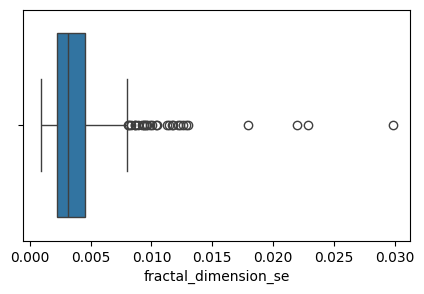

Boxplot of radius_worst


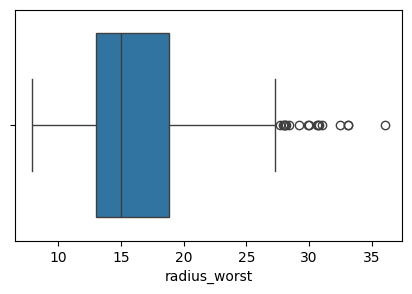

Boxplot of texture_worst


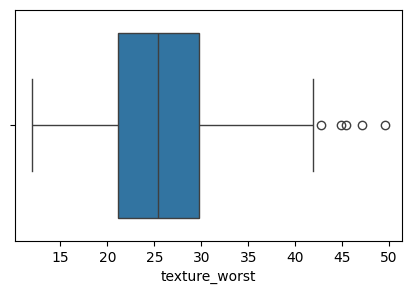

Boxplot of perimeter_worst


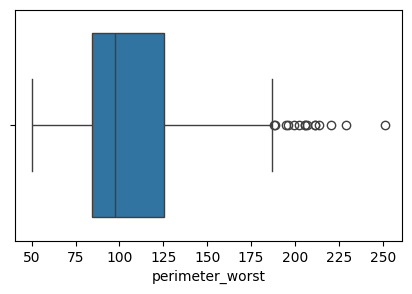

Boxplot of area_worst


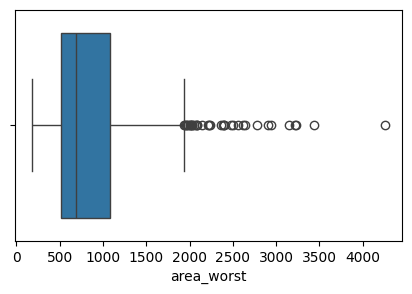

Boxplot of smoothness_worst


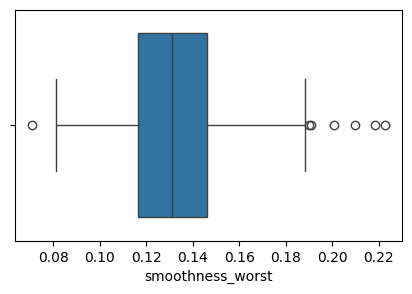

Boxplot of compactness_worst


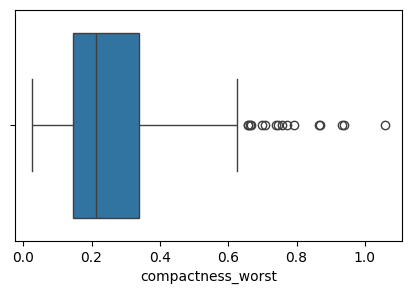

Boxplot of concavity_worst


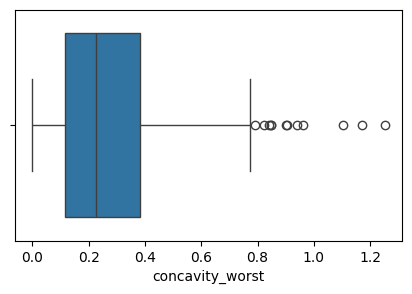

Boxplot of concave points_worst


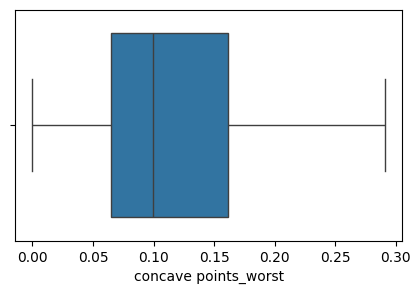

Boxplot of symmetry_worst


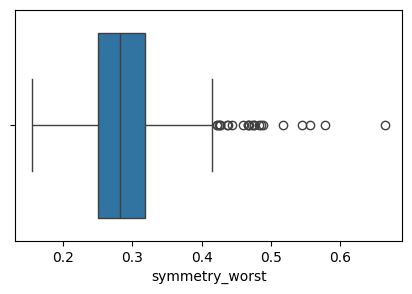

Boxplot of fractal_dimension_worst


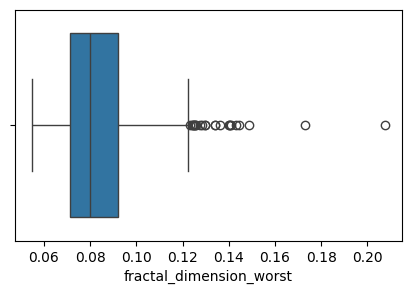

In [7]:
numeric_data=data.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
for column in numeric_data.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=numeric_data[column])
    print(f"Boxplot of {column}")
    plt.show()

# Remove Outliers

In [8]:
def detect_outliers(column,data):
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data
    

In [9]:
data=detect_outliers('radius_mean',data)
data=detect_outliers('texture_mean',data)
data=detect_outliers('perimeter_mean',data)
data=detect_outliers('area_mean',data)

<Axes: >

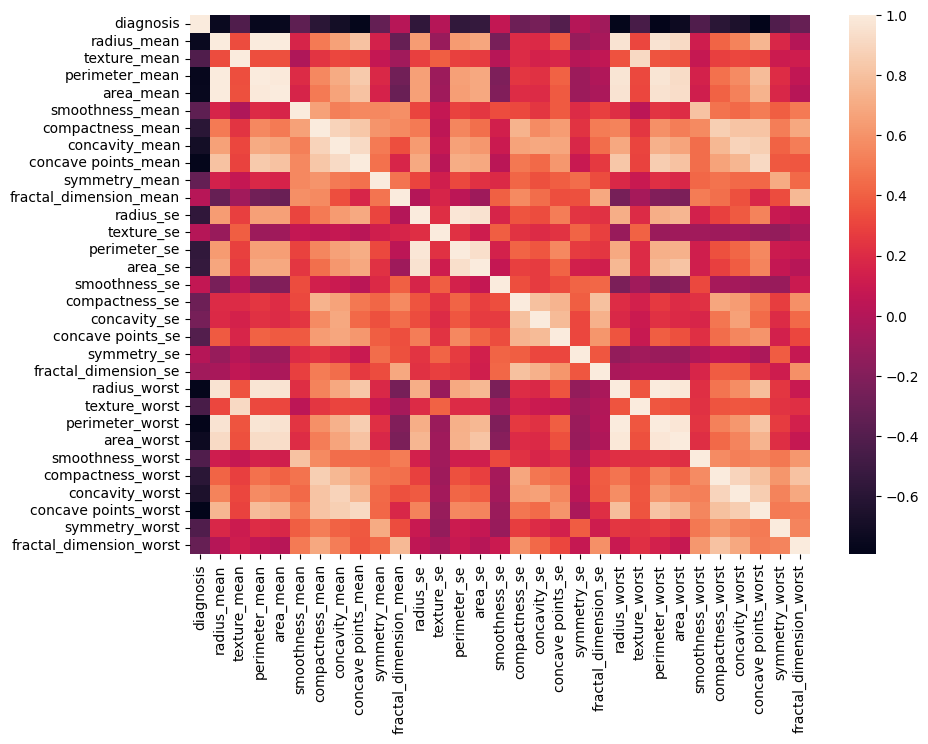

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr())

# Split Data

In [11]:
x=data.drop(["diagnosis"],axis=1)
y=data["diagnosis"]

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Build Models

In [13]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "KNN":KNeighborsClassifier(),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression()
}

# Define Parameters

In [14]:
param_grids = {
    "Random Forest Classifier": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    "Decision Tree Classifier": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini', 'entropy']
    },
    "Ada Boost Classifier": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Gradient Boosting Classifier": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
   "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100], 
        'penalty': ['l1', 'l2', 'elasticnet'],  
        'solver': ['liblinear', 'lbfgs', 'saga'], 
        'max_iter': [100, 200, 300] 
    }
}


In [15]:
results={}
for name,model in models.items():
    param_grid=param_grids[name]
    grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)
    grid_search.fit(x_train,y_train)
    best_model=grid_search.best_estimator_
    best_score=grid_search.best_score_
    best_params=grid_search.best_params_
    results[name]={
        "best_model":best_model,
        "best_score":best_score,
        "best_params":best_params
    }
    print(f"Best score for {name}:{best_score:.4f}")

for model,result in results.items():
    print(f"Best Model: {result['best_model']}")
    print(f"Best Score: {result['best_score']:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score for Random Forest Classifier:0.9626
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score for Decision Tree Classifier:0.9407
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

Best score for Ada Boost Classifier:0.9780
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best score for KNN:0.9407
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score for Gradient Boosting Classifier:0.9670
Fitting 5 folds for each of 135 candidates, totalling 675 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best score for Logistic Regression:0.9692
Best Model: RandomForestClassifier(max_depth=20)
Best Score: 0.9626
Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)
Best Score: 0.9407
Best Model: AdaBoostClassifier(n_estimators=150)
Best Score: 0.9780
Best Model: KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
Best Score: 0.9407
Best Model: GradientBoostingClassifier(n_estimators=200)
Best Score: 0.9670
Best Model: LogisticRegression(C=100, penalty='l1', solver='liblinear')
Best Score: 0.9692


In [16]:
result_model={
    "Model Name":["Random Forest Classifier","Decision Tree Classifier","Ada Boost Classifier","KNN","Gradient Boosting Classifier","Logistic Regression"],
    "Accuracy":[96.26,94.07,97.80,94.07,96.70,96.92]
}

In [17]:
model_result=pd.DataFrame(result_model)

# Model Accuracy 

In [18]:
model_result

,Model Name,Accuracy
0,Random Forest Classifier,96.26
1,Decision Tree Classifier,94.07
2,Ada Boost Classifier,97.80
3,KNN,94.07
4,Gradient Boosting Classifier,96.70
5,Logistic Regression,96.92


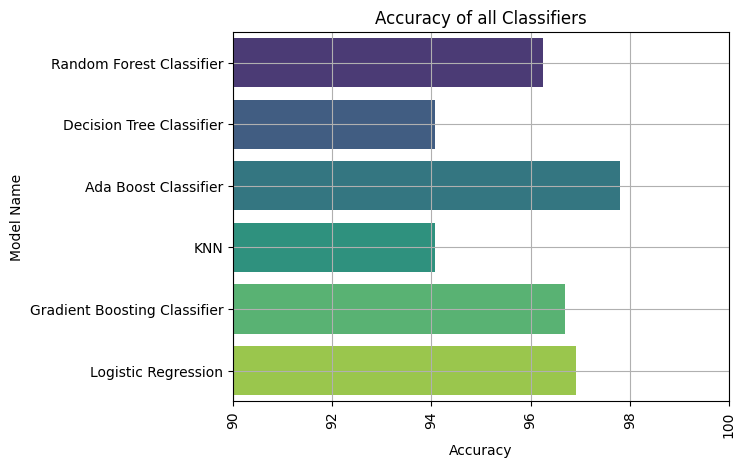

In [19]:
sns.barplot(y="Model Name",x="Accuracy",data=model_result,palette="viridis")
plt.xticks(rotation=90)
plt.title("Accuracy of all Classifiers")
plt.xlim(90,100)
plt.grid(True)
plt.show()